In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [4]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.nunique(axis = 0)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [8]:
df[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
EstimatedSalary,0.002085,-1.181518
Balance,-0.141109,-1.489412
CreditScore,-0.071607,-0.425726


<AxesSubplot:xlabel='Age', ylabel='Count'>

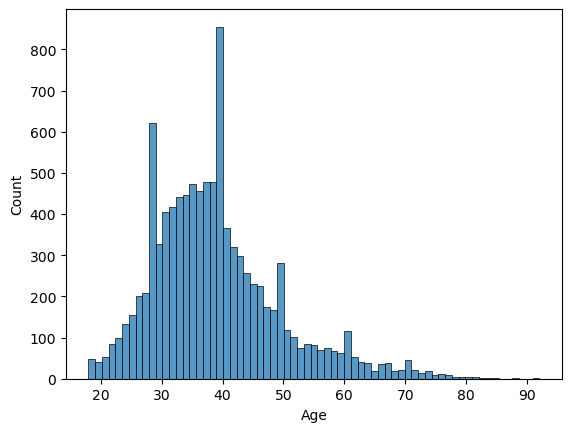

In [9]:
sns.histplot(df['Age'])

## Age attribute is highly right skewed as predicted by the skew value and thus is confirmed by the histplot.

In [10]:
df = df[df['Age'] < 62]

<AxesSubplot:xlabel='Age', ylabel='Count'>

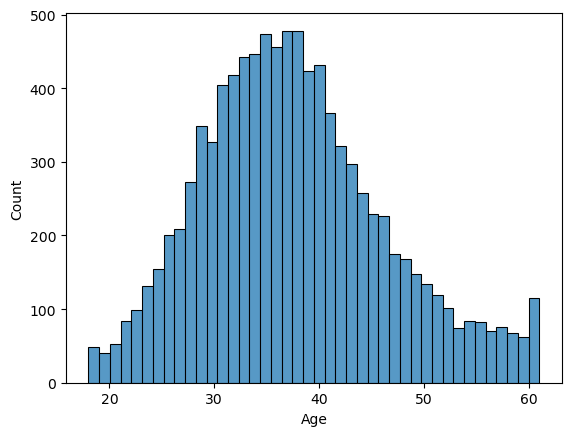

In [11]:
sns.histplot(df['Age'])

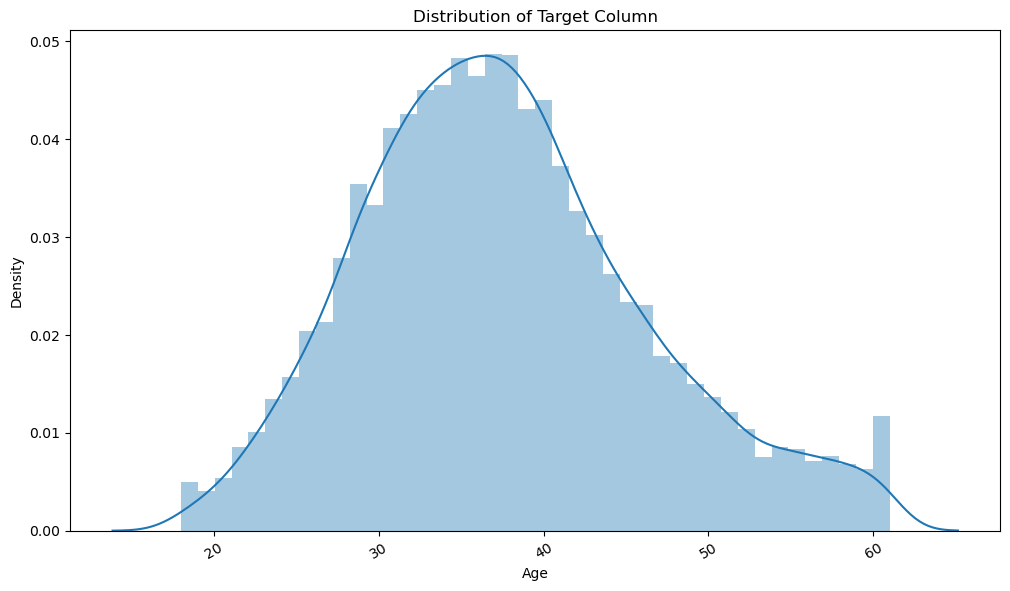

In [12]:
plt.rcParams['figure.figsize'] = (12, 6.5)
plt.xticks(rotation=30)
sns.distplot(df['Age'])
plt.title('Distribution of Target Column')
plt.show()

In [13]:
samples = np.random.choice(a=df['Age'],size=500)
population_mean = np.mean(df['Age'])

print(f"Population Mean is: {round(population_mean,3)} \nSample Mean is: {round(np.mean(samples),3)}")

Population Mean is: 37.66 
Sample Mean is: 37.776


In [14]:
import scipy.stats as stats
import math

sample_size = 1000
samples = np.random.choice(a=df['Age'],size=sample_size) # let's get a huge sample size

sample_mean = np.mean(samples)

z_critical = stats.norm.ppf(q=0.95) 
pop_std = np.std(df['Age']) 

margin_of_error = z_critical * (pop_std/math.sqrt(sample_size)) 
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error) # 95% confidence interval

print(f"The critical z value is {z_critical} \nThe 95% CI is {confidence_interval} \nThe true population mean is {population_mean}")

The critical z value is 1.6448536269514722 
The 95% CI is (37.075404302448796, 37.9745956975512) 
The true population mean is 37.66044425904683


In [15]:
df.shape

(9589, 11)

In [16]:
df[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.447215,-0.066750
EstimatedSalary,-0.002566,-1.180225
Balance,-0.140901,-1.486291
CreditScore,-0.072742,-0.422768


In [17]:
df['Geography'].value_counts()

France     4808
Germany    2411
Spain      2370
Name: Geography, dtype: int64

In [18]:
df.groupby('Geography').Gender.value_counts()

Geography  Gender
France     Male      2648
           Female    2160
Germany    Male      1262
           Female    1149
Spain      Male      1326
           Female    1044
Name: Gender, dtype: int64

In [19]:
df.groupby('Gender').Balance.mean()

Gender
Female    75737.959694
Male      77229.193994
Name: Balance, dtype: float64

In [20]:
df.groupby('Gender').EstimatedSalary.mean()

Gender
Female    100642.826138
Male       99832.361996
Name: EstimatedSalary, dtype: float64

## Female employees have lesser balance inspite of the fact that they are earning more.

In [21]:
df['IsActiveMember'].value_counts()

1    4815
0    4774
Name: IsActiveMember, dtype: int64

## Non-active members are nearly 50%, which should not be the case for an ideal business.

In [22]:
df.groupby('Gender').IsActiveMember.value_counts()

Gender  IsActiveMember
Female  0                 2220
        1                 2133
Male    1                 2682
        0                 2554
Name: IsActiveMember, dtype: int64

In [23]:
df['Exited'].value_counts()

0    7646
1    1943
Name: Exited, dtype: int64

## Almost 20% employees have exited the service that is not a great sign for the bank.

In [24]:
df.groupby('Exited').IsActiveMember.value_counts()

Exited  IsActiveMember
0       1                 4114
        0                 3532
1       0                 1242
        1                  701
Name: IsActiveMember, dtype: int64

## There is still a large number of people who haven't exited but are not active members also, which is again a major threat.

<AxesSubplot:xlabel='Geography', ylabel='count'>

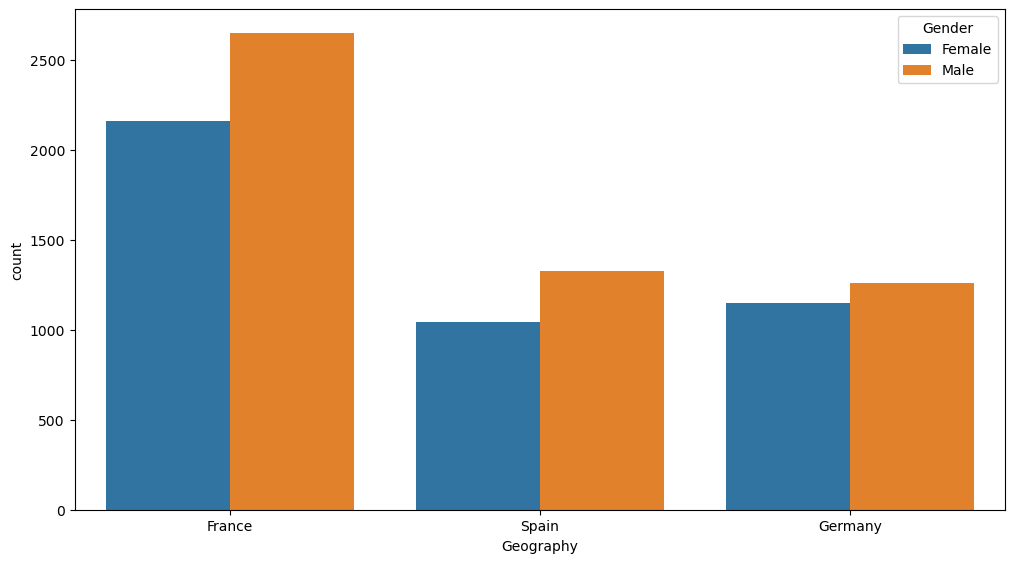

In [25]:
sns.countplot(data=df,x='Geography', hue='Gender')

## Germany has the least difference between the number of male and female members.

<AxesSubplot:xlabel='Geography', ylabel='count'>

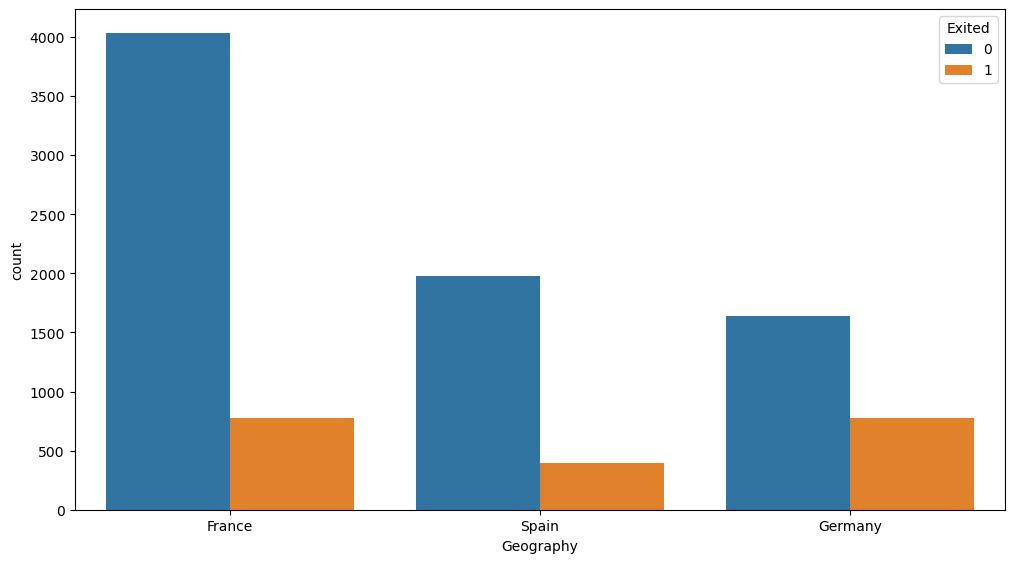

In [26]:
sns.countplot(data=df,x='Geography', hue='Exited')

## Germany seems to have the highest number of members exiting the service. 

<AxesSubplot:xlabel='Gender', ylabel='count'>

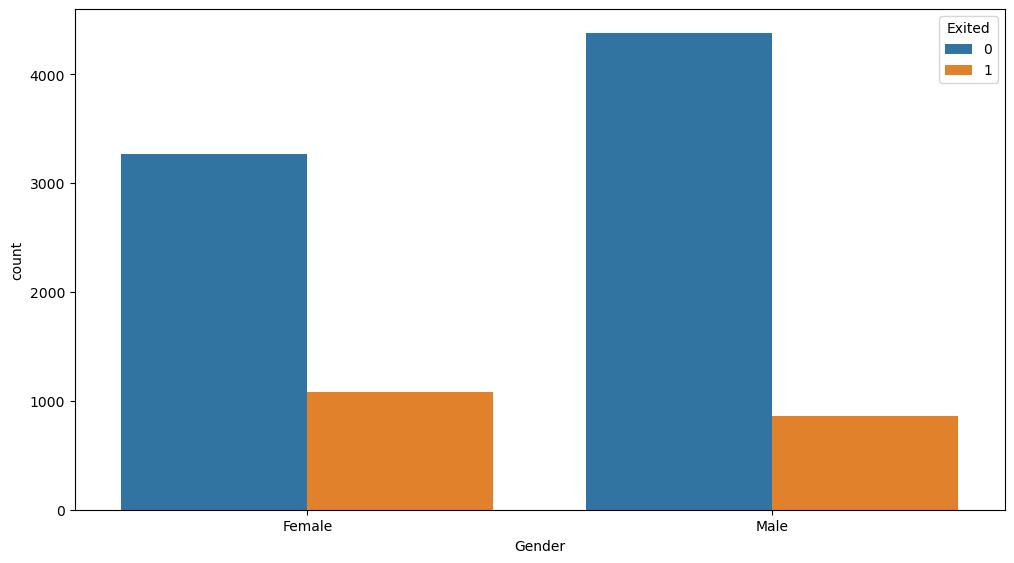

In [27]:
sns.countplot(data=df,x='Gender', hue='Exited')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>

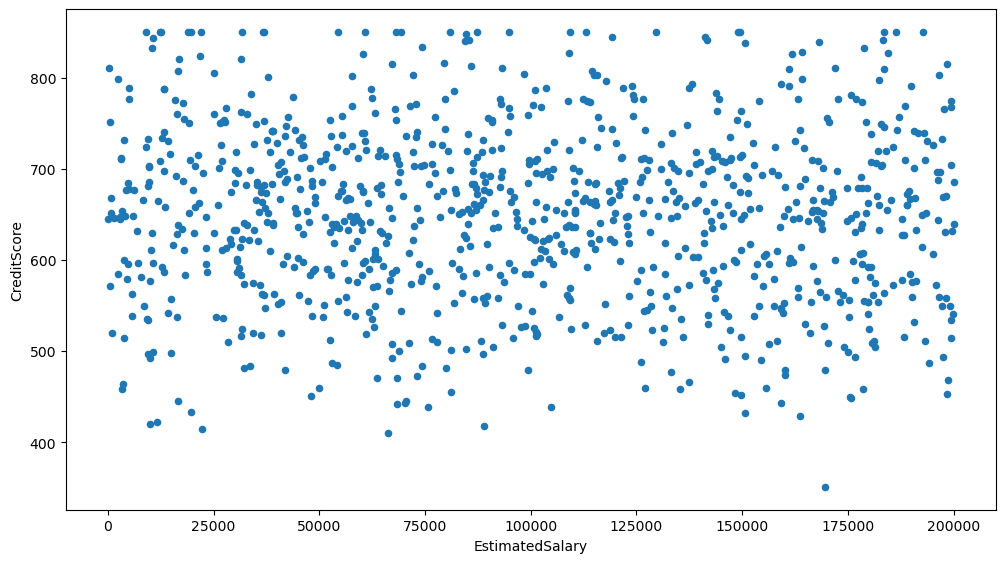

In [28]:
df.sample(1000).plot(kind='scatter',x='EstimatedSalary',y='CreditScore')

## Credit Score doesn't seem to have much impact on Estimated Salary.

In [29]:
df.groupby(['Gender']).HasCrCard.value_counts()

Gender  HasCrCard
Female  1            3060
        0            1293
Male    1            3708
        0            1528
Name: HasCrCard, dtype: int64

In [30]:
df.groupby('HasCrCard')['Exited'].value_counts()

HasCrCard  Exited
0          0         2238
           1          583
1          0         5408
           1         1360
Name: Exited, dtype: int64

In [31]:
df.groupby(['NumOfProducts'])['Exited'].value_counts()

NumOfProducts  Exited
1              0         3517
               1         1349
2              0         4087
               1          327
3              1          208
               0           42
4              1           59
Name: Exited, dtype: int64

## People using 4 products are always exiting, irrespective of any other condition.

In [32]:
df.groupby(['Geography','Gender'])['Exited'].value_counts()

Geography  Gender  Exited
France     Female  0         1722
                   1          438
           Male    0         2311
                   1          337
Germany    Female  0          724
                   1          425
           Male    0          911
                   1          351
Spain      Female  0          821
                   1          223
           Male    0         1157
                   1          169
Name: Exited, dtype: int64

## Females are more likely to exit the service.

In [33]:
df.groupby(['Balance'])['Exited'].value_counts()

Balance    Exited
0.00       0         2984
           1          482
3768.69    1            1
12459.19   1            1
14262.80   0            1
                     ... 
216109.88  1            1
221532.80  0            1
222267.63  1            1
238387.56  1            1
250898.09  1            1
Name: Exited, Length: 6124, dtype: int64

## People having zero balance are more likely to exit the service, comprising 38% of the exited ones.

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

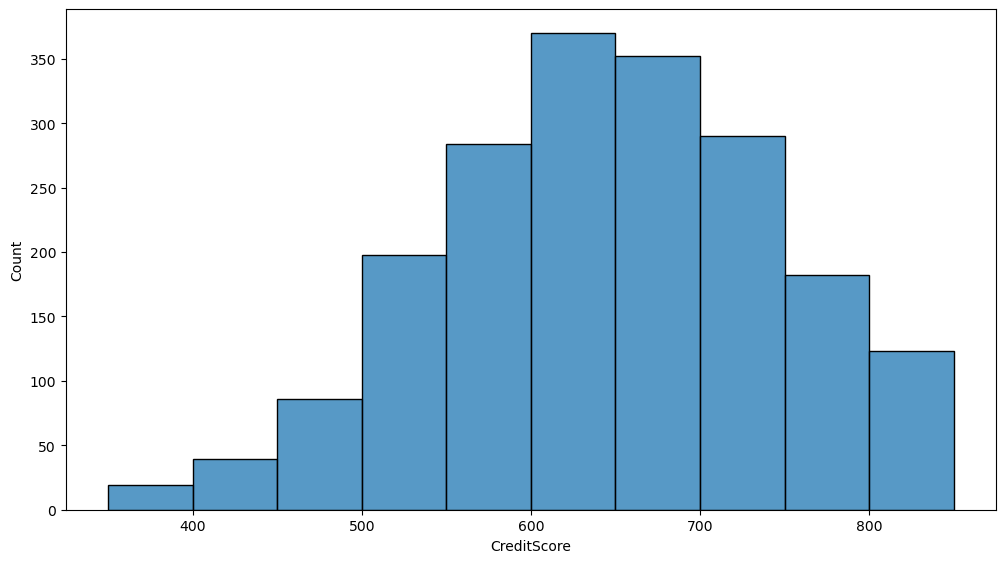

In [34]:
sns.histplot(data=df[df['Exited'] == 1], x='CreditScore', bins=10)

## Individuals with credit scores range in 550 and 750 exited the most.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

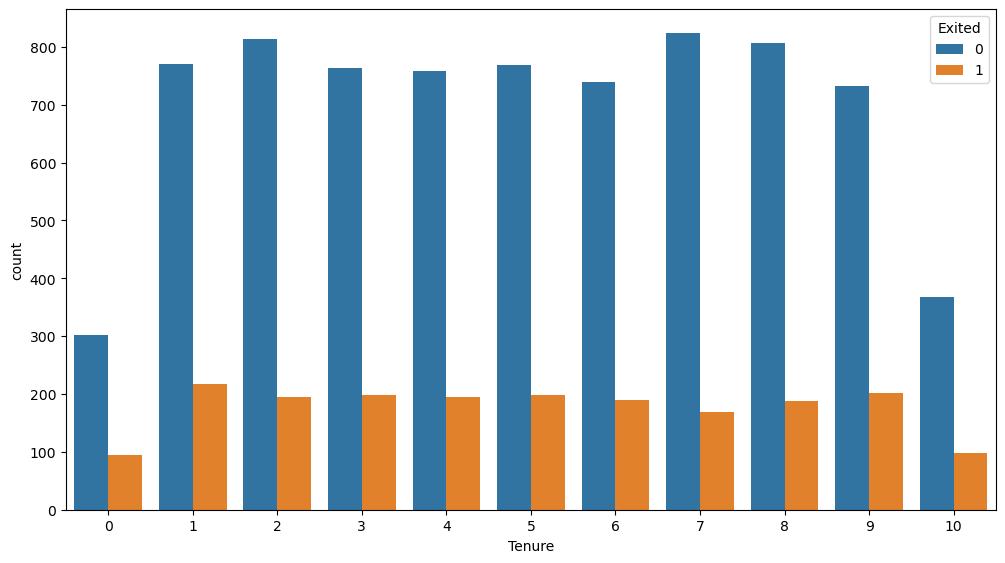

In [35]:
sns.countplot(data = df,x ='Tenure', hue = 'Exited')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

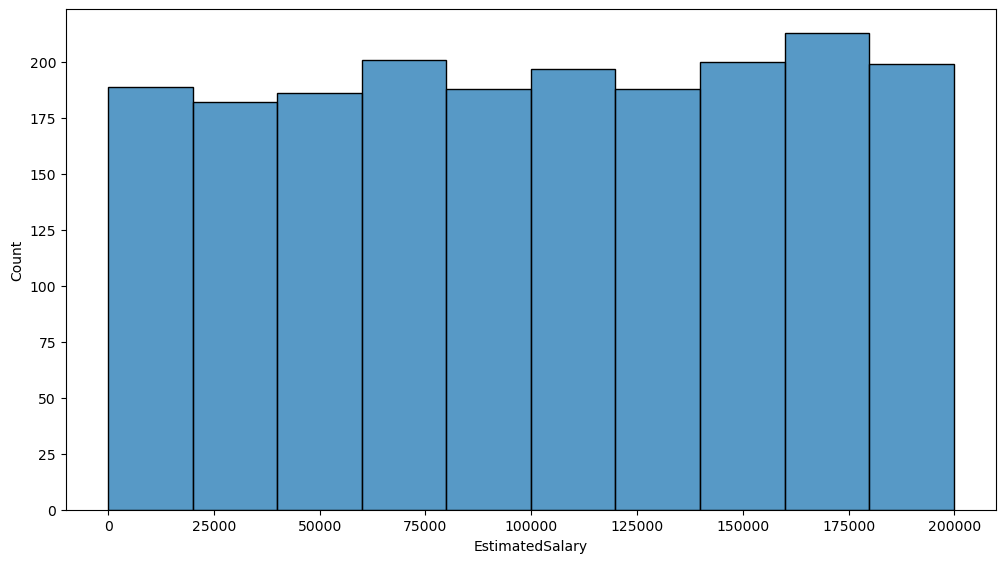

In [36]:
sns.histplot(data = df[df['Exited'] == 1], x = 'EstimatedSalary', bins=10)

## There is no any significant impact of EstiamtedSalary on Churn.

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

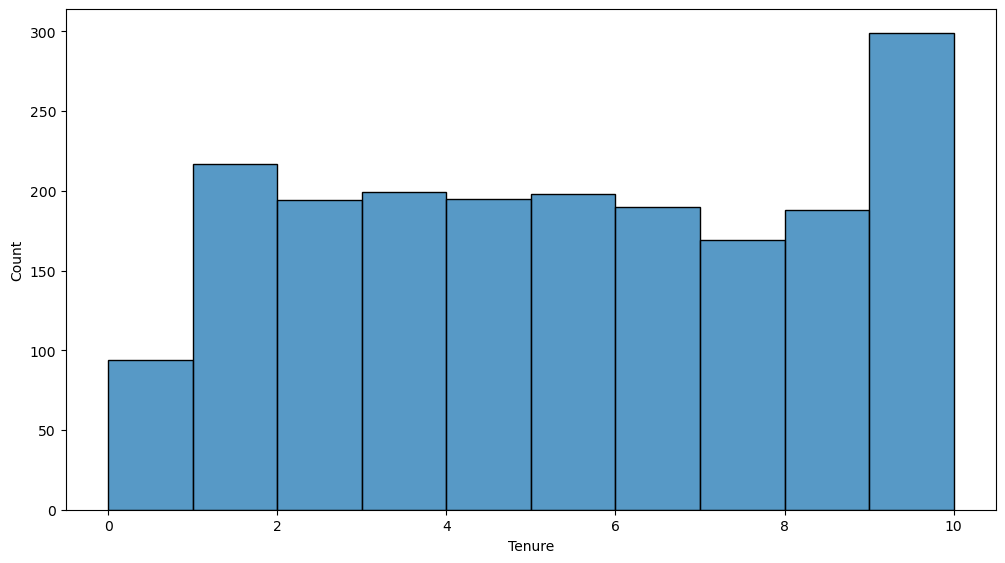

In [37]:
sns.histplot(data = df[df['Exited'] == 1], x='Tenure', bins=10)

In [38]:
max(df[(df['Exited'] == 1) & (df['Tenure'] >= 8)].Age)

61

In [39]:
min(df[(df['Exited'] == 1) & (df['Tenure'] >= 8)].Age)

19

In [40]:
df[(df['Exited'] == 1) & (df['Tenure'] >= 8) & (df['Age'] == 19)].value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
589          Germany    Female  19   9       83495.11  1              1          1               143022.31        1         1
dtype: int64

## This is worth noticing that a 19 year-old was having 1 product, and was an active member also with a decent balance as well as high salary and tenure of 9 years, exited the service.

In [41]:
df[(df['Exited'] == 1) & (df['Tenure'] >= 8) & (df['Age'] == 61)].value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
536          France     Female  61   8       65190.29   1              1          1               64308.49         1         1
615          Spain      Male    61   9       0.00       2              1          0               150227.85        1         1
732          Germany    Female  61   9       94867.18   2              1          1               157527.60        1         1
758          Germany    Female  61   8       125397.21  1              1          0               182184.09        1         1
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [45]:
df = pd.get_dummies(data = df, columns = ['Geography','Gender'])
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [46]:
mm=MinMaxScaler()
df[['Balance','EstimatedSalary']]=mm.fit_transform(df[['Balance','EstimatedSalary']])

In [47]:
mm=MinMaxScaler()
df[['CreditScore']] = mm.fit_transform(df[['CreditScore']])

In [48]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,42,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [49]:
X = df.drop(columns = 'Exited', axis = 1)
y = df['Exited']

In [50]:
from imblearn.over_sampling import RandomOverSampler
ROS=RandomOverSampler(sampling_strategy='minority')
X_balanced,y_balanced= ROS.fit_resample(X,y)

In [51]:
X_balanced.shape

(15292, 13)

In [52]:
X_scaled=mm.fit_transform(X_balanced)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state=42)

In [54]:
X_train.shape

(12233, 13)

In [55]:
X_test.shape

(3059, 13)

# 1. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [57]:
y1_pred=LR.predict(X_test)

In [58]:
df_check1=pd.DataFrame({'Actual':y_test, 'Predicted by LR Model':y1_pred})
df_check1.head(10)

,Actual,Predicted by LR Model
5339,1,1
2140,0,1
895,0,0
3950,0,0
12709,1,0
6480,1,0
5318,0,1
6298,1,1
9966,1,0
4629,1,0


In [59]:
LR.score(X_test, y_test)

0.7149395227198431

# 2.Decision Tree Classifier 

In [60]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y2_pred=DT.predict(X_test)

In [62]:
df_check2=pd.DataFrame({'Actual':y_test, 'Predicted by DT':y2_pred})
df_check2.head(10)

,Actual,Predicted by DT
5339,1,1
2140,0,1
895,0,0
3950,0,0
12709,1,1
6480,1,1
5318,0,0
6298,1,1
9966,1,1
4629,1,1


In [63]:
DT.score(X_test, y_test)

0.916639424648578

# 3. Random Forest Classifer

In [64]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y3_pred=RF.predict(X_test)

In [66]:
df_check3=pd.DataFrame({'Actual':y_test, 'Predicted by RF':y3_pred})
df_check3.head(10)

,Actual,Predicted by RF
5339,1,1
2140,0,1
895,0,0
3950,0,0
12709,1,1
6480,1,1
5318,0,0
6298,1,1
9966,1,1
4629,1,1


In [67]:
RF.score(X_test, y_test)

0.9522719843085976

# 4. K-Nearest Neighbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y4_pred=knn.predict(X_test)

In [70]:
df_check4=pd.DataFrame({'Actual':y_test, 'Predicted by KNN':y4_pred})
df_check4.head(10)

,Actual,Predicted by KNN
5339,1,1
2140,0,1
895,0,0
3950,0,0
12709,1,1
6480,1,0
5318,0,0
6298,1,1
9966,1,1
4629,1,1


In [71]:
knn.score(X_test, y_test)

0.816933638443936

# 5. Extreme Gradient Boosting Classifier 

In [72]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
y5_pred=XGB.predict(X_test)

In [74]:
df_check5=pd.DataFrame({'Actual':y_test,'Predicted by XGBoost':y5_pred})
df_check5.head(10)

,Actual,Predicted by XGBoost
5339,1,1
2140,0,1
895,0,0
3950,0,0
12709,1,1
6480,1,0
5318,0,1
6298,1,1
9966,1,1
4629,1,1


In [75]:
XGB.score(X_test, y_test)

0.9009480222294868

# Hyperparameter Tuning using GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression

In [77]:
paramgrid={'penalty':['l1', 'l2'], 'C': [0.1], 'solver': ['newton-cg', 'lbfgs', 'liblinear'],'max_iter':[350]}

In [78]:
grid_search1=GridSearchCV(LogisticRegression(random_state=42), paramgrid)
grid_search1.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1], 'max_iter': [350], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [79]:
grid_search1.best_params_

{'C': 0.1, 'max_iter': 350, 'penalty': 'l1', 'solver': 'liblinear'}

In [80]:
grid_search1.best_score_

0.7248436435423622

#### A very little improvement is observed in Logistic Regression Score from 71.8% to 72.1% that is not much significant.

## 2. Decision Tree Classifier 

In [81]:
params = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy",'log_loss'], 'splitter': ["best", "random"]}

In [82]:
grid_search2 = GridSearchCV(DT, param_grid = params, cv=5, scoring = 'f1')
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [83]:
grid_search2.best_params_

{'criterion': 'log_loss',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [84]:
grid_search2.best_score_

0.8435011194839811

#### The accuracy score of Decision Tree Classifier decreased from 91% to 84% so there is no any sense of going with the latter. 

## 3. Random Forest Classifier

In [85]:
params={'max_depth':[1,2,3,4,5,6,7,8,9,10], 'n_estimators':[1,2,3,4,5,6,7,8,9,10,15,20,25], 'criterion': ["gini", "entropy", "log_loss"]}

In [86]:
grid_search3=GridSearchCV(RF,param_grid=params,scoring='precision')
grid_search3.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25]},
             scoring='precision')

In [87]:
grid_search3.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=1)

In [88]:
grid_search3.best_score_

0.8438417122891474

####  The accuracy score of Random Forest Classifier decreased from 95% to 84% so again, there is no any sense of going with the latter.

## Of all the algorithms, Random Forest Classifier (with default parameters) is the best algorithm for this model providing an accuracy of 95%.